COPYRIGHT © 2018 Kiran Arun <kironni@gmail.com>

### Setup

In [1]:
# install dependencies
!rm -r Neural_Networks-101-demo
!git clone -b explanations https://github.com/KiranArun/Neural_Networks-101-demo.git
!python3 /content/Neural_Networks-101-demo/scripts/setup.py helper_funcs

rm: cannot remove 'Neural_Networks-101-demo': No such file or directory
Cloning into 'Neural_Networks-101-demo'...
remote: Counting objects: 352, done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 352 (delta 30), reused 57 (delta 14), pack-reused 271
Receiving objects: 100% (352/352), 7.53 MiB | 19.71 MiB/s, done.
Resolving deltas: 100% (153/153), done.
Getting helper functions...


# MNIST Handwritten Digits Classifier

In [2]:
import keras                       # import keras, our machine learning library
import numpy as np                 # import numpy, our linear algebra library
import matplotlib.pyplot as plt    # import matplotlib, our graph plotting library

import helper_funcs as helper

Using TensorFlow backend.


In [3]:
# this is the directory where we will keep and external files, eg. data, logs
model_root_dir = '/content/'

# get data
mnist = helper.MNIST_data(model_root_dir+'MNIST_data/')

Download complete.
Save complete.


In [0]:
image_dims = (28,28)    # image dimension sizes
input_size = 28**2      # image input size
num_classes = 10        # number of different digits written

In [0]:
batch_size = 100        # number of images fed in to each training step
learning_rate = 0.2     # learning rate

epochs = 2              # number of times we feed in the data set

hidden_size = 256

In [0]:
# reset session
# this is so you dont have to reset kernal and run whole notebook
# you can run from here to give keras and tensorflow a blank canvas
keras.backend.clear_session()

In [7]:
# create model
model = keras.models.Sequential()

# hidden layer
model.add(keras.layers.Dense(units=hidden_size,
                             activation='relu',
                             input_shape=(input_size,)))

# output layer
model.add(keras.layers.Dense(units=num_classes,
                             activation='softmax'))

# show model structure
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [0]:
# define loss function
# define optimizer
# also return accuracy as a performance metric
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=learning_rate),
              metrics=['accuracy'])

In [9]:
# train model
history = model.fit(x=mnist.train_images, y=mnist.train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(mnist.validation_images, mnist.validation_labels))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 4s 67us/step - loss: 0.3518 - acc: 0.8997 - val_loss: 0.1655 - val_acc: 0.9556
Epoch 2/2
55000/55000 [==============================] - 3s 53us/step - loss: 0.1760 - acc: 0.9496 - val_loss: 0.1175 - val_acc: 0.9696


In [10]:
# show evaluation accuracy
score = model.evaluate(mnist.test_images, mnist.test_labels, verbose=0)
print('Test accuracy:', str(round(100*score[1],2))+'%')

Test accuracy: 95.91%


prediction: 2 answer: 2
0 0.004%
1 0.0%
2 99.835%
3 0.093%
4 0.0%
5 0.0%
6 0.001%
7 0.004%
8 0.063%
9 0.0%


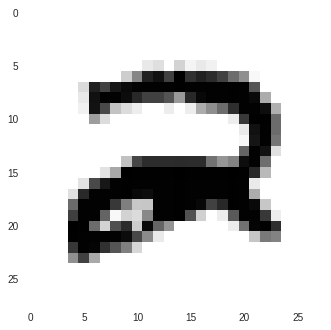

prediction: 8 answer: 8
0 0.0%
1 0.001%
2 0.024%
3 0.349%
4 0.11%
5 0.013%
6 0.001%
7 0.001%
8 98.499%
9 1.001%


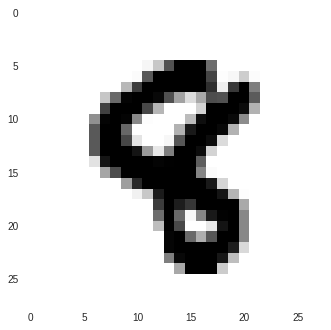

In [11]:
# test and show test images
test_idxs = [1,11]

for test_idx in test_idxs:
    test_x, test_y = mnist.test_images[test_idx].reshape(1,-1), mnist.test_labels[test_idx].reshape(1,-1)

    _prediction = model.predict(test_x)

    print('prediction:', np.argmax(_prediction), 'answer:', np.argmax(test_y))

    for i,val in enumerate(_prediction[0]):
        print(i, str(round((100*val),3))+'%')

    plt.imshow(test_x.reshape(image_dims), cmap='binary')
    plt.grid(False)
    plt.show()